In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import re
from numpy.random import choice

## Age groups population

In [3]:
df_dummy = pd.read_csv('../data/Age_and_sex.txt',sep='\t', header=2, thousands=',')
df_age = df_dummy.drop(labels=['#Males.','Females.','Males.', 'Females..1', 'Males..1', 'Females..2'], axis=1).drop(labels=['Unspecified minors', 'Unspecified adults'], axis=0).reset_index().rename(columns={'Males..2' : 'Males', 'Females..3' : 'Females', 'index':'Ages'})
df_age

,Ages,Males,Females
0,Under 5 years,67320,64735
1,5 years and under 10 years,62340,60478
2,10 years and under 15 years,55532,53693
3,15 years and under 20 years,45012,46392
4,20 years and under 25 years,30419,46759
5,25 years and under 30 years,40018,48557
6,30 years and under 35 years,46166,47415
7,35 years and under 40 years,46138,44311
8,40 years and under 45 years,36758,33866
9,45 years and under 50 years,32993,27745


## Death dates

In [19]:
df_dummy = pd.read_csv('../data/mortality_by_age_military_11Sept2025.csv',sep=',', header=0)
df_deathdates = df_dummy.dropna()
df_deathdates.loc[:,'date_death'] = pd.to_datetime(df_deathdates.loc[:,'date_death'])
df_deathdates #.pivot(index='date_death', columns=['age_group', 'military_binary', 'deaths'])

,date_death,age_group,military_binary,deaths
0,1918-09-01 00:00:00,20-24,Y,1
1,1918-09-02 00:00:00,20-24,Y,4
2,1918-09-02 00:00:00,25-29,Y,2
3,1918-09-03 00:00:00,20-24,Y,2
4,1918-09-03 00:00:00,25-29,Y,1
...,...,...,...,...
1576,1919-02-24 00:00:00,35-39,Y,1
1577,1919-02-25 00:00:00,25-29,Y,1
1578,1919-02-25 00:00:00,30-34,Y,1
1579,1919-02-25 00:00:00,35-39,Y,1


In [22]:
print("Total deaths = {},    Military deaths = {},    Civilian deaths = {}".format(df_deathdates['deaths'].sum(),
                                                                                   df_deathdates.loc[df_deathdates['military_binary']=='Y','deaths'].sum(),
                                                                                   df_deathdates.loc[df_deathdates['military_binary']=='N','deaths'].sum()))

Total deaths = 9116,    Military deaths = 1147,    Civilian deaths = 7969


In [23]:
df_deathdates.loc[df_deathdates['military_binary']=='Y'].drop_duplicates(subset=['age_group'])

,date_death,age_group,military_binary,deaths
0,1918-09-01 00:00:00,20-24,Y,1
2,1918-09-02 00:00:00,25-29,Y,2
5,1918-09-03 00:00:00,30-34,Y,1
9,1918-09-04 00:00:00,35-39,Y,6
10,1918-09-04 00:00:00,40-44,Y,1
11,1918-09-05 00:00:00,15-19,Y,1
125,1918-10-28 00:00:00,45-49,Y,1
277,1918-11-06 00:00:00,50-54,Y,1
361,1918-11-10 00:00:00,10-14,Y,1
447,1918-11-13 00:00:00,65-69,Y,1


In [5]:
def find_number_of_deaths_by_date(df):
    df_out = df.drop_duplicates(subset=['date_death','military_binary']).copy()
    df_out.loc[:,'total deaths'] = 0
    #df_out.set_index('date_death')
    for i, row in df_out.iterrows():
        #print(row['deaths'])
        deaths_that_day = df.loc[(df['date_death']==row['date_death']) & (df['military_binary']==row['military_binary'])]
        df_out.loc[i, 'total deaths'] += deaths_that_day['deaths'].sum()
    return df_out

## Military vs Non-Military

### From NZ yearbook 1919

A total of 9,924 troops were in training at the date of the Armistice. __The complete number of troops and nurses provided for foreign service up to the cessation of hostilities was therefore 110,368__—more than 10 per cent. of the Dominion's total mean population in 1914. A further total of 3,370 are known to have left New Zealand to serve in British and Australian Forces.

The great majority of these troops were volunteers. Of __124,211 men provided from the commencement of the war to the 12th November, 1918__, 91,941 were volunteers, and 32,270 were conscripted under the Military Service Act, 1916.

__"Wastage" whilst undergoing training accounted for a loss to the Force of 11,333__.
CASUALTIES .

Casualties in the Expeditionary Force were, unfortunately, very high. The following is a summary as on the 4th August, 1919:—
—	officers.	Other Ranks.	Totals.
Killed in action	489	9,751	10,240
Died of wounds	200	3,763	3,963
Died of disease	64	1,535	1,599
Died, cause unknown	12	806	818
Drowned	10	58	68
__Total dead__	775	15,913	__16,688__
Missing	Nil	1	1
Prisoners of war	Nil	Nil	Nil.
__Wounded__	1,721	39,594	__41,315__
Grand total	2,496	55,508	58,004

__On the declaration of the Armistice in November, 1918, the following New Zealand troops were overseas:__—
In France	24,115
In England	23,467
In Egypt	4,541
__Total	52,123__

In deciding the order of return to New Zealand it was arranged that as a general principle those who had been longest on service were to be returned first, but that all invalids and convalescents were to be got away as rapidly as suitable transport was available and their condition permitted.

__An average of 4,500 men per month from the United Kingdom and France, and 500 men per month from Egypt, were returned to New Zealand from the date of the Armistice.__

Approximately 3,000 wives and 600 children of New Zealand soldiers who were married abroad were brought to New Zealand in the troopships during the period of demobilization.

Men demobilized in New Zealand after active service abroad have been given four weeks' leave on full pay, together with a privilege railway pass entitling them to travel free on the New Zealand railways for that period.

In [33]:
print("Estimating total # of military as {}, calculated from total toops - dead - overseas + one month from overseas".format(110368-16688-52123+5000))

Estimating total # of military as 46557, calculated from total toops - dead - overseas + one month from overseas


In [7]:
death_df = find_number_of_deaths_by_date(df_deathdates)
#mil_deaths_df = find_number_of_deaths_by_date(df_deathdates.loc[df_deathdates['military_binary']=='Y'])
#civ_deaths_df = find_number_of_deaths_by_date(df_deathdates.loc[df_deathdates['military_binary']=='N'])
print("Total deaths = {} ,   Total mil deaths = {} ,   Total non-mil deaths = {}".format(death_df['total deaths'].sum(), death_df.loc[death_df['military_binary']=='Y','total deaths'].sum(), death_df.loc[death_df['military_binary']=='N','total deaths'].sum()))

Total deaths = 9116 ,   Total mil deaths = 1147 ,   Total non-mil deaths = 7969


In [8]:
death_df

,date_death,age_group,military_binary,deaths,total deaths
0,1918-09-01 00:00:00,20-24,Y,1,1
1,1918-09-02 00:00:00,20-24,Y,4,6
3,1918-09-03 00:00:00,20-24,Y,2,4
6,1918-09-04 00:00:00,20-24,Y,5,23
11,1918-09-05 00:00:00,15-19,Y,1,16
...,...,...,...,...,...
1572,1919-02-22 00:00:00,20-24,Y,1,2
1574,1919-02-23 00:00:00,20-24,Y,1,1
1575,1919-02-24 00:00:00,25-29,Y,1,2
1577,1919-02-25 00:00:00,25-29,Y,1,3


In [9]:
mil_civ_deaths_by_dates = death_df.pivot(index='date_death',columns=['military_binary'], values='total deaths').fillna(0)

In [60]:
#mil_civ_deaths_by_dates.to_csv('mil_and_civ_deaths_by_date.csv')

In [26]:
#mil_deaths_df.to_csv('military_deaths_by_date.csv')
#civ_deaths_df.to_csv('civilian_deaths_by_date.csv')


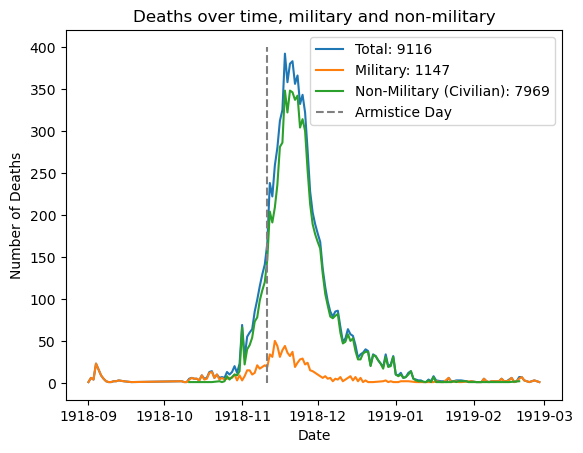

In [22]:
x, y = death_df['date_death'], death_df['total deaths']
plt.plot(x,y, label='Total: {}'.format(y.sum()))
x,y = mil_deaths_df['date_death'], mil_deaths_df['total deaths']
plt.plot(x,y, label='Military: {}'.format(y.sum()))
x,y = civ_deaths_df['date_death'], civ_deaths_df['total deaths']
plt.plot(x,y, label='Non-Military (Civilian): {}'.format(y.sum()))
plt.vlines(pd.to_datetime('1918-11-11'), 0, 400, colors='grey', linestyles='dashed', label='Armistice Day')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('Deaths over time, military and non-military')
#plt.savefig('Deaths_total_mil_civ_over_time.pdf')

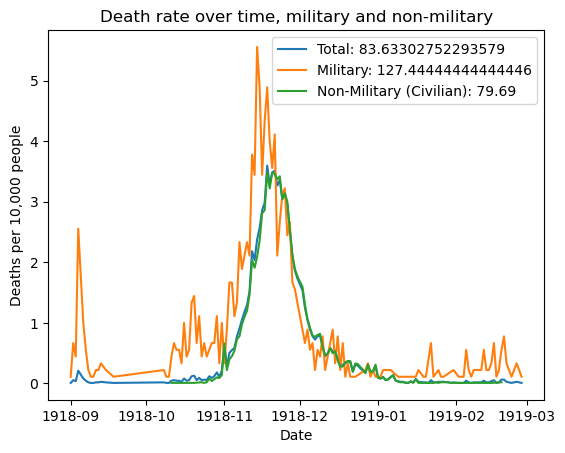

In [23]:
x, y = death_df['date_death'], death_df['total deaths'] / 1090000 * 10000
plt.plot(x,y, label='Total: {}'.format(y.sum()))
x,y = mil_deaths_df['date_death'], mil_deaths_df['total deaths'] / 90000 * 10000
plt.plot(x,y, label='Military: {}'.format(y.sum()))
x,y = civ_deaths_df['date_death'], civ_deaths_df['total deaths'] / 1000000 * 10000
plt.plot(x,y, label='Non-Military (Civilian): {}'.format(y.sum()))
#plt.vlines(pd.to_datetime('1918-11-11'), 0, 400, colors='grey', linestyles='dashed', label='Armistice Day')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Deaths per 10,000 people')
plt.title('Death rate over time, military and non-military')
#plt.savefig('Death_rate_mil_civ_over_time.pdf')

# By age group

In [24]:
def add_plot_for_age_group(age_group, df):
    death_series = df.loc[df['age_group']==age_group]
    x,y = death_series['date_death'], death_series['deaths']
    plt.plot(x, y, label=(age_group+": {}".format(y.sum())))


def combine_age_groups(df, new_age_groups = {'0-19': ['0-4','5-9','10-14','15-19'],
                                             '20-49': ['20-24','25-29','30-34','35-39','40-44','45-49'],
                                             '50+': ['50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99']}):
    
    df_out = df.drop_duplicates(subset=['date_death']).copy()

    for new_age in new_age_groups.keys():
        df_out.loc[:,new_age+' military'] = 0
        df_out.loc[:,new_age+' civilian'] = 0

    for i, row in df_out.iterrows():
        #print(row['deaths'])
        for new_age, old_age_list in new_age_groups.items(): 
            for oa in old_age_list:
                mil_deaths_that_day_that_age = df.loc[(df['date_death']==row['date_death']) & (df['age_group']==oa) & (df['military_binary']=='Y')]
                civ_deaths_that_day_that_age = df.loc[(df['date_death']==row['date_death']) & (df['age_group']==oa) & (df['military_binary']=='N')]
                #print(deaths_that_day_that_age['deaths'].sum())
                df_out.loc[i, new_age+' military'] += mil_deaths_that_day_that_age['deaths'].sum()
                df_out.loc[i, new_age+' civilian'] += civ_deaths_that_day_that_age['deaths'].sum()

    return df_out

#for i,row in df_deathdates.drop_duplicates(subset='age_group').iterrows():
#    add_plot_for_age_group(row['age_group'], df_deathdates)
#plt.legend()

In [25]:
df_deaths_age_groups = combine_age_groups(df_deathdates).drop(columns=['age_group', 'deaths', 'military_binary'])
df_deaths_age_groups

,date_death,0-19 military,0-19 civilian,20-49 military,20-49 civilian,50+ military,50+ civilian
0,1918-09-01 00:00:00,0,0,1,0,0,0
1,1918-09-02 00:00:00,0,0,6,0,0,0
3,1918-09-03 00:00:00,0,0,4,0,0,0
6,1918-09-04 00:00:00,0,0,23,0,0,0
11,1918-09-05 00:00:00,1,0,15,0,0,0
...,...,...,...,...,...,...,...
1572,1919-02-22 00:00:00,0,0,2,0,0,0
1574,1919-02-23 00:00:00,0,0,1,0,0,0
1575,1919-02-24 00:00:00,0,0,2,0,0,0
1577,1919-02-25 00:00:00,0,0,3,0,0,0


In [28]:
print("Total deaths = {},    Military deaths = {},    Civilian deaths = {}".format(df_deaths_age_groups[['0-19 military', '0-19 civilian', '20-49 military', '20-49 civilian', '50+ military', '50+ civilian']].sum(axis=1).sum(),
                                                                                   df_deaths_age_groups[['0-19 military', '20-49 military', '50+ military']].sum(axis=1).sum(),
                                                                                   df_deaths_age_groups[['0-19 civilian', '20-49 civilian', '50+ civilian']].sum(axis=1).sum(),))

Total deaths = 9116,    Military deaths = 1147,    Civilian deaths = 7969


In [29]:
#df_deaths_age_groups.to_csv('deaths_by_age_and_date_and_military.csv')

Text(0.5, 1.0, 'Deaths over time by age group')

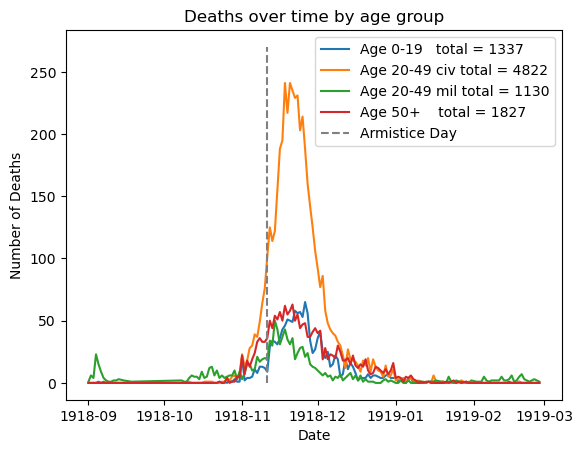

In [31]:
x,y = df_deaths_age_groups['date_death'] , df_deaths_age_groups['0-19 civilian']+df_deaths_age_groups['0-19 military']
plt.plot(x,y, label='Age 0-19   total = {}'.format(y.sum()))
x,y = df_deaths_age_groups['date_death'] , df_deaths_age_groups['20-49 civilian']
plt.plot(x,y, label='Age 20-49 civ total = {}'.format(y.sum()))
x,y = df_deaths_age_groups['date_death'] , df_deaths_age_groups['20-49 military']
plt.plot(x,y, label='Age 20-49 mil total = {}'.format(y.sum()))
x,y = df_deaths_age_groups['date_death'] , df_deaths_age_groups['50+ civilian']+df_deaths_age_groups['50+ military']
plt.plot(x,y, label='Age 50+    total = {}'.format(y.sum()))
plt.vlines(pd.to_datetime('1918-11-11'), 0, 270, colors='grey', linestyles='dashed', label='Armistice Day')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('Deaths over time by age group')
#plt.savefig('death_over_time_by_age_group.pdf')

In [14]:
N_0_19  = (df_age.loc[:,'Males'] + df_age.loc[:,'Females']).loc[0:3].sum()
N_20_49 = (df_age.loc[:,'Males'] + df_age.loc[:,'Females']).loc[4:9].sum()
N_50p   = (df_age.loc[:,'Males'] + df_age.loc[:,'Females']).loc[10:].sum()
print("Number of 0 - 19:  {} ,\nNumber of 20 - 49: {} ,\nNumber of 50+:     {},\n     Total number :   {}".format(N_0_19, N_20_49, N_50p, N_0_19+ N_20_49+ N_50p))

Number of 0 - 19:  455502 ,
Number of 20 - 49: 481145 ,
Number of 50+:     161536,
     Total number :   1098183


Text(0.5, 1.0, 'Deaths per 10,000 over time by age group')

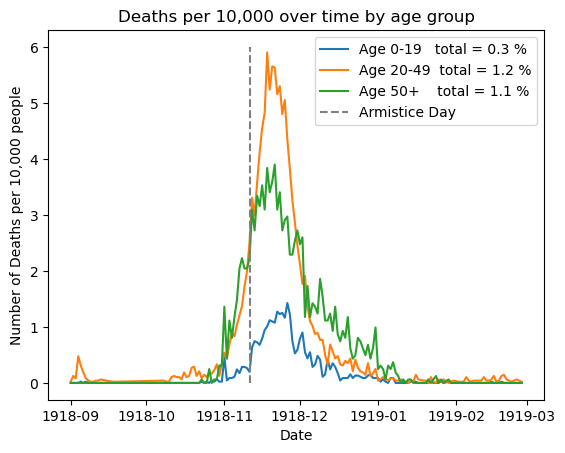

In [15]:
x,y = df_deaths_age_groups['date_death'] , 10000*df_deaths_age_groups['0-19'] / N_0_19
plt.plot(x,y, label='Age 0-19   total = {:.1f} %'.format(y.sum()/100))
x,y = df_deaths_age_groups['date_death'] , 10000*df_deaths_age_groups['20-49'] / N_20_49
plt.plot(x,y, label='Age 20-49  total = {:.1f} %'.format(y.sum()/100))
x,y = df_deaths_age_groups['date_death'] , 10000*df_deaths_age_groups['50+'] / N_50p
plt.plot(x,y, label='Age 50+    total = {:.1f} %'.format(y.sum()/100))
plt.vlines(pd.to_datetime('1918-11-11'), 0, 6, colors='grey', linestyles='dashed', label='Armistice Day')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Deaths per 10,000 people')
plt.title('Deaths per 10,000 over time by age group')
#plt.savefig('Death_rate_over_time_by_age_group.pdf')

# From NZ yearbook 1919

A total of 9,924 troops were in training at the date of the Armistice. __The complete number of troops and nurses provided for foreign service up to the cessation of hostilities was therefore 110,368__—more than 10 per cent. of the Dominion's total mean population in 1914. A further total of 3,370 are known to have left New Zealand to serve in British and Australian Forces.

The great majority of these troops were volunteers. Of __124,211 men provided from the commencement of the war to the 12th November, 1918__, 91,941 were volunteers, and 32,270 were conscripted under the Military Service Act, 1916.

__"Wastage" whilst undergoing training accounted for a loss to the Force of 11,333__.
CASUALTIES .

Casualties in the Expeditionary Force were, unfortunately, very high. The following is a summary as on the 4th August, 1919:—
—	officers.	Other Ranks.	Totals.
Killed in action	489	9,751	10,240
Died of wounds	200	3,763	3,963
Died of disease	64	1,535	1,599
Died, cause unknown	12	806	818
Drowned	10	58	68
__Total dead__	775	15,913	__16,688__
Missing	Nil	1	1
Prisoners of war	Nil	Nil	Nil.
__Wounded__	1,721	39,594	__41,315__
Grand total	2,496	55,508	58,004

__On the declaration of the Armistice in November, 1918, the following New Zealand troops were overseas:__—
In France	24,115
In England	23,467
In Egypt	4,541
__Total	52,123__

In deciding the order of return to New Zealand it was arranged that as a general principle those who had been longest on service were to be returned first, but that all invalids and convalescents were to be got away as rapidly as suitable transport was available and their condition permitted.

__An average of 4,500 men per month from the United Kingdom and France, and 500 men per month from Egypt, were returned to New Zealand from the date of the Armistice.__

Approximately 3,000 wives and 600 children of New Zealand soldiers who were married abroad were brought to New Zealand in the troopships during the period of demobilization.

Men demobilized in New Zealand after active service abroad have been given four weeks' leave on full pay, together with a privilege railway pass entitling them to travel free on the New Zealand railways for that period.